In [74]:
import re
from typing import Tuple
from collections import deque
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [72]:
class Robot:
    def __init__(self, position: Tuple[int, int], velocity: Tuple[int, int]):
        self.position = position
        self.velocity = velocity

class Area:
    def __init__(self, shape: Tuple[int, int]):
        self.shape = shape
        self.area = {(x, y): deque([]) for x in range(shape[1]) for y in range(shape[0])}

    def __str__(self):
        result = ''
        for row in range(self.shape[0]):
            result += ''.join(str(len(self.area[(col, row)])) if len(self.area[(col, row)]) != 0 else '.' for col in range(self.shape[1])) + '\n'
        return result

    def add_robot(self, robot: Robot):
        if robot.position in self.area:
            self.area[robot.position].append(robot)

    @property
    def robot_distribution(self):
        return {position: len(robots) for position, robots in self.area.items()}

    @property
    def grid(self):
        current_distribution = self.robot_distribution
        grid = np.zeros(self.shape, dtype=int)
        for position, robots in current_distribution.items():
            grid[position[1], position[0]] = robots
        return grid

    def teleport(self):
        current_number_robots = self.robot_distribution
        for position, robots in self.area.items():
            if len(robots) == 0:
                continue
            for _ in range(current_number_robots[position]):
                robot = robots.popleft()
                robot.position = ((robot.position[0] + robot.velocity[0]) % self.shape[1], (robot.position[1] + robot.velocity[1]) % self.shape[0])
                self.add_robot(robot)

    def safety_factor(self):
        x_m = self.shape[1] // 2
        y_m = self.shape[0] // 2

        counts = 4 * [0]
        for position, robots in self.area.items():
            if position[0] < x_m:
                if position[1] < y_m:
                    counts[0] += len(robots)
                elif position[1] > y_m:
                    counts[1] += len(robots)
            elif position[0] > x_m:
                if position[1] < y_m:
                    counts[2] += len(robots)
                elif position[1] > y_m:
                    counts[3] += len(robots)
        return reduce(lambda acc, x: acc * x, counts)

    def calculate_entropy(self, local_size: Tuple[int, int]=(3, 5)):
        grid = self.grid
        n = self.shape[0] // local_size[0]
        m = self.shape[1] // local_size[1]
        total_robots = grid.sum()
        distribution = np.array([grid[i * local_size[0]: (i + 1) * local_size[0], j * local_size[1]: (j + 1) * local_size[1]].sum() / total_robots for i in range(n + 1) for j in range(m + 1)])
        distribution = distribution[distribution != 0]
        return abs((distribution * np.log2(distribution)).sum())


In [18]:
def read_and_parse_file(file_path: str, area: Area):
    pattern = r'p=(-?\d+),(-?\d+)\sv=(-?\d+),(-?\d+)'
    with open(file_path, 'r') as f:
        for line in f:
            match = re.search(pattern, line.strip())
            if match:
                p = (int(match.group(1)), int(match.group(2)))
                v = (int(match.group(3)), int(match.group(4)))
                robot = Robot(p, v)
                area.add_robot(robot)

In [70]:
inputs = 'inputs/day14.txt'
sample = 'samples/day14.txt'

area = Area((103, 101))
read_and_parse_file(inputs, area)
for _ in range(100):
    area.teleport()
print(area.safety_factor())

224357412


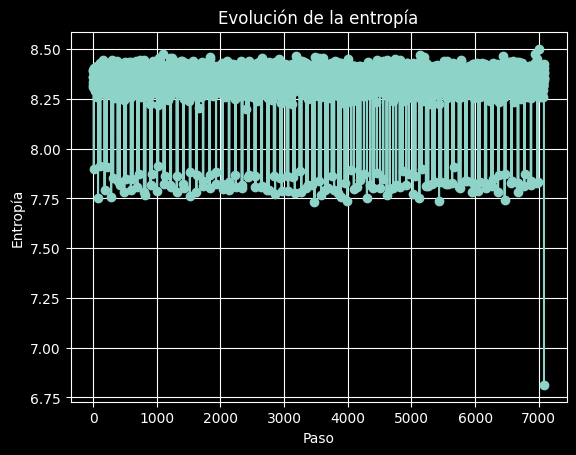

6.812779236400414 7082


In [84]:
area = Area((103, 101))
read_and_parse_file(inputs, area)
steps = 7083
entropies = []
for step in range(steps):
    area.teleport()
    entropies.append(area.calculate_entropy())

plt.plot(range(steps), entropies, marker='o')
plt.xlabel('Paso')
plt.ylabel('Entropía')
plt.title('Evolución de la entropía')
plt.grid()
plt.show()

min_entropy = np.min(entropies)
min_index = np.argmin(entropies)
print(min_entropy, min_index)

In [85]:
print(area)

.....................................................................................................
.......1...............................................................1.......1.....................
..1...............................................1..................................................
..........................................................1..................................1.......
.....................................................................................................
..................................................1..1.........................................1.....
....................................................................................................1
....................................................................1................................
...................................................................................................1.
......................................1...........................................